In [2]:
!pip install gdown
!pip install matplotlib
!pip install tensorflow
!pip install pandas
!pip install numpy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import zipfile
import gdown
import matplotlib.image as mpimg

In [4]:
# List of file IDs (from google drive that stores our dataset)
file_ids = [
    '1zNHqd0F-Y3tFuzPDf5KYg1QwQfq_Is8P',
    '1qdo1P-FaShwrf8uAtVganaOK1jPpproM',
]

# Folder to store downloaded ZIP files
zip_folder = 'zip_files'
os.makedirs(zip_folder, exist_ok=True)

# Folder to extract all ZIP files
extract_to = 'extracted_images'
os.makedirs(extract_to, exist_ok=True)

# download and extract all ZIP files from our google drive
for i, file_id in enumerate(file_ids, 1):
    zip_path = os.path.join(zip_folder, f'file_{i}.zip') # each ZIP file will be stored as file_#.zip

    # downloading file from google drive
    gdown.download(f'https://drive.google.com/uc?id={file_id}', zip_path, quiet=False)

    # Extract the downloaded ZIP file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

print(f"Done, stored in {extract_to}")

Downloading...
From: https://drive.google.com/uc?id=1zNHqd0F-Y3tFuzPDf5KYg1QwQfq_Is8P
To: /Users/jacob/Downloads/zip_files/file_1.zip
100%|████████████████████████████████████████| 922k/922k [00:00<00:00, 19.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1qdo1P-FaShwrf8uAtVganaOK1jPpproM
From (redirected): https://drive.google.com/uc?id=1qdo1P-FaShwrf8uAtVganaOK1jPpproM&confirm=t&uuid=15323adf-dedc-4de1-8f38-c0729afacae7
To: /Users/jacob/Downloads/zip_files/file_2.zip
100%|██████████████████████████████████████| 72.2M/72.2M [00:04<00:00, 15.8MB/s]


Done, stored in extracted_images


In [5]:
main_folder = extract_to

image_extensions = {'.jpg', '.jpeg', '.png'}

In [6]:
path = 'extracted_images/S5E04'
classes = os.listdir(path)
classes

['.DS_Store', 'Without_Peter', 'With_Peter']

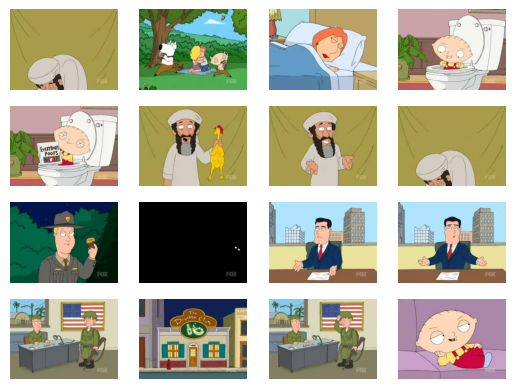

In [7]:
fig = plt.gcf()

with_dir = os.path.join('extracted_images/S5E04/With_Peter')
without_dir = os.path.join('extracted_images/S5E04/Without_Peter')
with_names = os.listdir(with_dir)
without_names = os.listdir(without_dir)

pic_index = 100

with_images = [os.path.join(with_dir, fname)
              for fname in with_dir[pic_index-16:pic_index]]
without_images = [os.path.join(without_dir, fname)
              for fname in without_names[pic_index-16:pic_index]]

for i, img_path in enumerate(with_images + without_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [8]:
base_dir = 'extracted_images/S5E04'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(320,240),
                                                  subset='training',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(320,240),
                                                  subset='validation',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)

Found 2761 files belonging to 2 classes.
Using 2485 files for training.
Found 2761 files belonging to 2 classes.
Using 276 files for validation.


In [9]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(320, 240, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 318, 238, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 159, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 157, 117, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 78, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 76, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 38, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 36, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 18, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     7,668,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,293,441 (31.64 MB)

 Trainable params: 8,290,369 (31.63 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [11]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [12]:
history = model.fit(train_datagen,
          epochs=10,
          validation_data=test_datagen)

Epoch 1/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 44s 547ms/step - accuracy: 0.8164 - loss: 0.4214 - val_accuracy: 0.8116 - val_loss: 0.4914
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 43s 548ms/step - accuracy: 0.9541 - loss: 0.1230 - val_accuracy: 0.9312 - val_loss: 0.2576
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 42s 543ms/step - accuracy: 0.9636 - loss: 0.1176 - val_accuracy: 0.5833 - val_loss: 4.6098
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 43s 557ms/step - accuracy: 0.9655 - loss: 0.1091 - val_accuracy: 0.4203 - val_loss: 7.8551
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 45s 570ms/step - accuracy: 0.9760 - loss: 0.0705 - val_accuracy: 0.8261 - val_loss: 0.8017
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 43s 556ms/step - accuracy: 0.9605 - loss: 0.1074 - val_accuracy: 0.8841 - val_loss: 1.0313
Epoch 7/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 45s 581ms/step - accuracy: 0.9747 - loss: 0.0744 - val_accuracy: 0.6848 - val_loss: 1.7348
Epoch 8/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 43s 557ms/step - accuracy: 0.9707 - loss: 0.0748 - val_accu

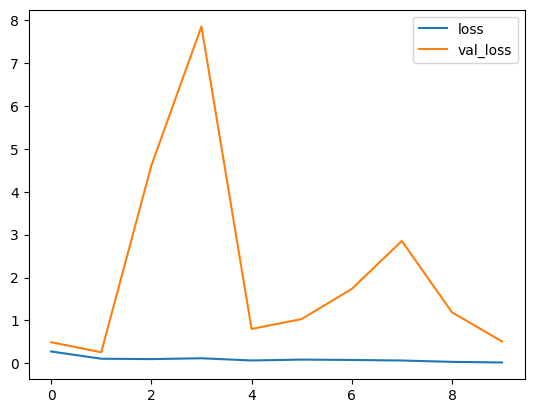

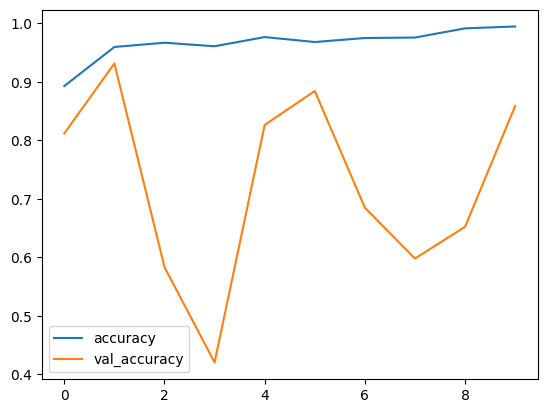

In [13]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Without Peter
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Without Peter
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
With Peter
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
With Peter
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Without Peter


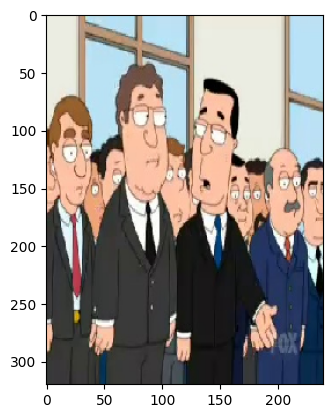

In [14]:
from keras.preprocessing import image
image_paths = ['extracted_images/S5E04/Without_Peter/S5E04_500.jpg',
               'extracted_images/S5E04/Without_Peter/S5E04_1000.jpg',
               'extracted_images/S5E04/With_Peter/S5E04_1500.jpg',
               'extracted_images/S5E04/With_Peter/S5E04_2000.jpg',
               'extracted_images/S5E04/Without_Peter/S5E04_2683.jpg']
#Input image
for i in range(len(image_paths)):
    test_image = image.load_img(image_paths[i],target_size=(320,240))
    
    #For show image
    plt.imshow(test_image)
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image,axis=0)
    
    # Result array
    result = model.predict(test_image)
    
    #Mapping result array with the main name list
    i=0
    if(result<=0.5):
      print("With Peter")
    else:
      print("Without Peter")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
With Peter


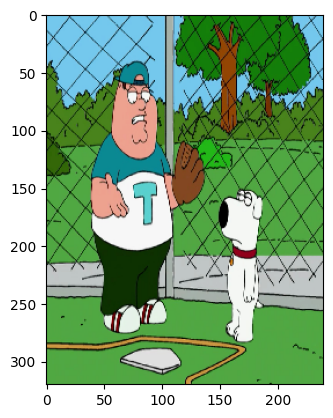

In [16]:
test_image = image.load_img('extracted_images/initial model test/S1E05_500.jpg',target_size=(320,240))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result<=0.5):
  print("With Peter")
else:
  print("Without Peter")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Without Peter


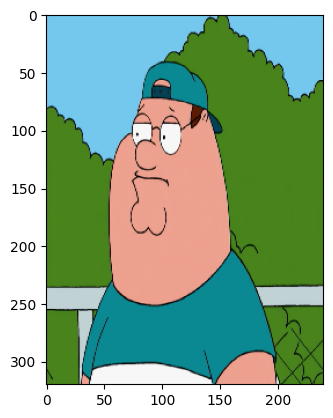

In [17]:
test_image = image.load_img('extracted_images/initial model test/S1E05_1000.jpg',target_size=(320,240))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result<=0.5):
  print("With Peter")
else:
  print("Without Peter")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Without Peter


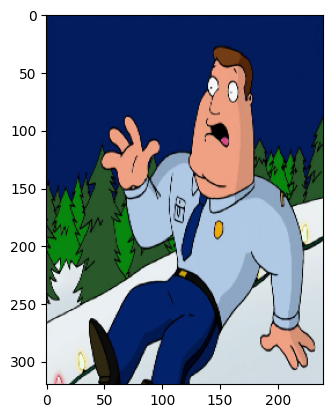

In [18]:
test_image = image.load_img('extracted_images/initial model test/S1E05_1500.jpg',target_size=(320,240))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result<=0.5):
  print("With Peter")
else:
  print("Without Peter")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Without Peter


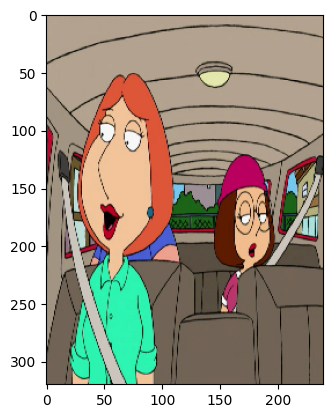

In [19]:
test_image = image.load_img('extracted_images/initial model test/S1E05_2000.jpg',target_size=(320,240))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result<=0.5):
  print("With Peter")
else:
  print("Without Peter")